<a href="https://colab.research.google.com/github/O-Aiden/CartoonGuidetoStatisticsByPython/blob/main/10%E3%80%8A%E6%BC%AB%E7%94%BB%E7%BB%9F%E8%AE%A1%E5%AD%A6%E3%80%8Bpython%E5%AE%9E%E7%8E%B0_%E5%8F%8C%E5%8F%98%E9%87%8F%E7%9A%84%E7%9B%B8%E5%85%B3%E5%88%86%E6%9E%90%E4%B9%8B%E7%9B%B8%E5%85%B3%E7%B3%BB%E6%95%B0%E5%92%8C%E7%9B%B8%E5%85%B3%E6%AF%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 相关系数
数值数据和数值数据

In [18]:
import pandas as pd
data = pd.read_csv("1-1汽车数据.csv",index_col=0)
data.head(3)

,能源类型,环保标准,上市时间,最大功率(kW),最大扭矩(N·m),发动机型号,变速箱类型,长*宽*高(mm),车身结构
0,柴油,国VI,2021.02,105,320,NaN,NaN,5350×1885×1825,皮卡
1,柴油,国VI,2021.02,105,320,NaN,NaN,5350×1885×1825,皮卡
2,柴油,国VI,2021.02,105,320,NaN,NaN,5350×1885×1825,皮卡


In [19]:
temp = data[["最大功率(kW)","最大扭矩(N·m)"]]
temp.corr()

,最大功率(kW),最大扭矩(N·m)
最大功率(kW),1.000000,-0.002478
最大扭矩(N·m),-0.002478,1.000000


## 相关度
数值数据和分类数据

In [92]:
import pandas as pd

temp = pd.read_excel('年龄和喜欢的服装品牌.xlsx',index_col=0)
temp.head(3)

,年龄,品牌
A,27,T
B,33,C
C,16,B


### 按照环保标准分类,求平均值和求合计

In [94]:
# 求平均值
mean = temp.groupby('品牌')['年龄'].mean()
mean.name = '平均值'

# 求和
sum = temp.groupby('品牌')['年龄'].sum()
sum.name = '合计'

data_group = pd.concat([pd.DataFrame(mean),pd.DataFrame(sum)], axis=1, join='inner')
data_group

# 整体合集
data_group_sum = data_group['合计'].sum()
# 整体平均
data_group_mean = data_group['平均值'].mean()

data_all = pd.DataFrame([[data_group_mean,data_group_sum]],columns=["平均值", "合计"],index=['整体'])
data_group = data_group.append(data_all)
data_group

,平均值,合计
B,21.000000,126
C,29.000000,145
T,26.000000,104
整体,25.333333,375


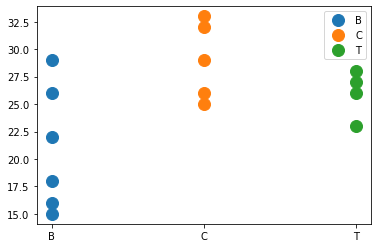

In [95]:
import matplotlib.pyplot as plt

groups = temp.groupby('品牌')
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['品牌'], group['年龄'], marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

## 步骤一：计算（年龄-年龄的平均值）的平方和

In [106]:
# （年龄-年龄的平均值）的平方
groups = temp.groupby('品牌')
SBB = pd.DataFrame((groups.get_group("B")['年龄'] - data_group['平均值']['B'])**2)['年龄'].sum()
print('SBB: ',SBB)
SCC = pd.DataFrame((groups.get_group("C")['年龄'] - data_group['平均值']['C'])**2)['年龄'].sum()
print('SCC: ',SCC)
STT = pd.DataFrame((groups.get_group("T")['年龄'] - data_group['平均值']['T'])**2)['年龄'].sum()
print('STT: ',STT)

SBB:  160.0
SCC:  50.0
STT:  14.0


## 步骤二：求出组内变异，也就是SBB+SCC+STT



In [125]:
S_O = SBB+SCC+STT
S_O

224.0

## 步骤三：求出组间变异

In [122]:
S_I = len(groups.get_group("B"))*(data_group['平均值']['B']-data_group['平均值']['整体'])**2+len(groups.get_group("C"))*(data_group['平均值']['C']-data_group['平均值']['整体'])**2+len(groups.get_group("T"))*(data_group['平均值']['T']-data_group['平均值']['整体'])**2
S_I

181.66666666666663

## 步骤四：求相关比的值

In [126]:
S = S_I/(S_O + S_I)
S

0.44782251437962195

In [127]:
# def corrr(temp,name_categ,name_numer):
#   """
#   temp:数据（分类数据和数值数据）
#   categ_data:分类数据名称
#   name_numer：数值数据名称
#   """
#   ## 数据分类
#   # 求平均值
#   mean = temp.groupby('name_categ')['name_numer'].mean()
#   mean.name = '平均值'

#   # 求和
#   sum = temp.groupby('name_categ')['name_numer'].sum()
#   sum.name = '合计'

#   data_group = pd.concat([pd.DataFrame(mean),pd.DataFrame(sum)], axis=1, join='inner')
#   data_group

#   # 整体合集
#   data_group_sum = data_group['合计'].sum()
#   # 整体平均
#   data_group_mean = data_group['平均值'].mean()

#   data_all = pd.DataFrame([[data_group_mean,data_group_sum]],columns=["平均值", "合计"],index=['整体'])
#   data_group = data_group.append(data_all)

#   ## 步骤一：
#   groups = temp.groupby('name_categ')
#   SBB = pd.DataFrame((groups.get_group("B")['name_numer'] - data_group['平均值']['B'])**2)['name_numer'].sum()
#   SCC = pd.DataFrame((groups.get_group("C")['name_numer'] - data_group['平均值']['C'])**2)['name_numer'].sum()
#   STT = pd.DataFrame((groups.get_group("T")['name_numer'] - data_group['平均值']['T'])**2)['name_numer'].sum()
#   ## 步骤二：
#   S_O = SBB+SCC+STT
#   ## 步骤三
#   S_I = len(groups.get_group("B"))*(data_group['平均值']['B']-data_group['平均值']['整体'])**2+len(groups.get_group("C"))*(data_group['平均值']['C']-data_group['平均值']['整体'])**2+len(groups.get_group("T"))*(data_group['平均值']['T']-data_group['平均值']['整体'])**2
#   ## 步骤四
#   S = S_I/(S_O + S_I)
#   return S
